# 1.4: Curve fitting to noisy data #

<!--<badge>--><a href="https://colab.research.google.com/github/anu-ilab/JupyterPracticals/blob/main/S1.4 - Curve fitting and linear uncertainty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

Imagine that you have a parameter estimation problem where you wish to
fit the following function to some observations of
$x_i, y_i, (i=1\dots,N)$

$$ y(x) = \frac{1}{100}\left[ \frac{m_1}{5} + \frac{m_2}{5}x +\frac{m_3}{16}(x^2 + 1600\sin(\frac{x}{2\pi})) \right ]. $$

<img src="../Figures/Example-data-curve.png" alt="Example of test data for regression problem with true curve (blue). Here the $x$ values are generated uniformly randomly between 0 and 120, while the $y$ values are equal to the curve height plus a Gaussian random error with $\sigma_y = 0.75$, i.e. $y_{obs} = y_{true} + \epsilon$, where $\epsilon \sim N(0, \sigma_y^2)$." width="600"/>

Figure 1. Example of test data for regression problem with true curve (blue). Here the $x$ values are generated uniformly randomly between 0 and 120, while the $y$ values are equal to the curve height plus a Gaussian random error with $\sigma_y = 0.75$, i.e. $y_{obs} = y_{true} + \epsilon$, where $\epsilon \sim N(0, \sigma_y^2)$.

In Figure 1 I have used $m_1 = m_2 = m_3 = 1.0$ to generate the true curve.


First load some libraries.

In [1]:
# -------------------------------------------------------- #
#                                                          #
#     Uncomment below to set up environment on "colab"     #
#                                                          #
# -------------------------------------------------------- #

# !pip install -U anu-inversion-course
# !git clone https://github.com/anu-ilab/JupyterPracticals
# %cd JupyterPracticals

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import pickle
import sys
sys.path.append("software")
import plotcovellipse as pc

We now read in a data set of 12 value for this curve and plot them. This
    is the test data for your problem.

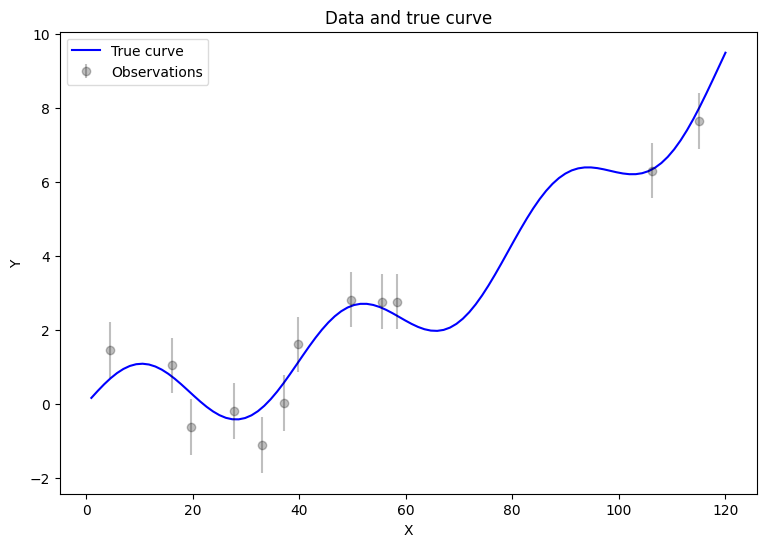

In [11]:
xmin, xmax, nres = 1.0, 120.0, 100
#
# read in observations
#
pickle_off = open("datasets/data_fitting.pickle","rb")
[yobs,xobs,x_fine,y_fine] = pickle.load(pickle_off)
sigmay = 0.75

# ----------------------------------------------------------------------------   
# plot data
# ----------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(9,6))

ax.plot(x_fine, y_fine,label='True curve',color='b')
ax.errorbar(xobs,yobs,yerr=sigmay,fmt='o',color=(0, 0, 0, 0.25),label='Observations')
plt.legend(loc='upper left',framealpha=0.7)
plt.title('Data and true curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**Task 1:** 
    We want to estimate the parameters $(m_1, m_2, m_3)$ from the
    observations. This problem can be written in vector form as
    ${\bf d} = G {\bf m}$. 
    
   Describe what are ${\bf d}$, ${\bf m}$ and
    $G$ for this problem?
    
   What dimensions does the $G$ matrix have? 
    
   Is this a linear or nonlinear parameter estimation problem and why? 
    
The G matrix can be used to find the $y$ values of the curve from the $x$ values and the $m$ parameters, through ${\bf d} = G {\bf m}$ 

Calculate
    the $G$ matrix for this problem corresponding to the 12 $x$ values of the data.
   

In [12]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 




**Task 2:** Use the $G$ matrix and your data to estimate a least squares
    solution for the parameters $(m_1,m_2,m_3)$. Calculate the curve
    that this solution predicts and plot it with the data, its
    errors and the true curve.

In [13]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



**Task 3:** Calculate the Chi-square value for this problem. Is this a good
        enough fit to data? Calculate the p-value for this goodness of
        fit. What do you conclude from the p-value?

Repeat the calculation with the noise error, $\sigma_y=0.25$.
        How would this change the Chi-square and p-value? What would you
        conclude in this case?

Repeat the calculation with the noise error, $\sigma_y=2.25$.
        How would this change the Chi-square and p-value? What would you
        conclude in this case?

In [14]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



**Task 4:** Calculate model covariance matrix for the problem and from this find
    the 95% confidence intervals for each parameter $m_1, m_2$ and
    $m_3$. Calculate the model correlation matrix. Do you see any
    significant trade-off in the model parameter errors? Plot the
    confidence ellipses for the $(m_1, m_2)$, $(m_2, m_3)$ and
    $(m_1, m_3)$ planes. How do any trade-offs you observed in the model
    covariance matrix manifest themselves in the plots of the covariance
    matrix?

In [15]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 



**Task 5:** Generate 1000 feasible solutions for the model parameters and for
    each one generate and plot the predicted curves, with the data and
    the true curve from the least squares solution.
    
If you multiply the `G` matrix by the model vector `m`, it will give you the predicted y values at the x values of the data. Using only these x values will create a crude plot of the curve, i.e. by joining together just 12 predicted y values. To get a smoother curve you can generate a new `G_fine` matrix using a much finer grid of x values between 1 and 120. This already exists in the array `x_fine`. If you build a matrix `G_fine` using `x_fine` it will be a $120\times 3$ matrix. By multiplying `G_fine`  by each of your feasible solutions `m` and then plotting the y values obtained, you will get a better representation of each oscillating curve.

In [16]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

#

**Task 6** With feasible solutions calculated in this way we could investigate how the data constrain any other property of either the model parameter or the data. 

For example plot the histogram of the predicted curves sampled at $X=100$. What does this tell you about the predicted Y values at this value of X?

Now plot the histogram of the variable $z=m_1+m_2^2$ from the feasible solutions. What does this tell you about constraint on $z$ provided by the data? Note that we have not actually solved for $z$ directly, but found its histogram from the feasible values of the model parameters.

In [17]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

#

**Task 7**  Repeat the calculation of the model covariance matrix and 95%
    Confidence intervals but assuming data errors are smaller than they actually are. Set $\sigma_y = 0.25$. What
    do you notice about each these new error estimates? How would you
    rectify the situation to get reasonable model parameter errors?

In [18]:
# Try it here! You can insert more cells by selecting Cell > Insert Cell Above/Below from the menu
# bar, or by pressing Esc to enter command mode and then hitting A or B (for above/below). 

#

----